In [18]:
# Imports
import os
import cv2
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
# Paths
RAW_DATA_DIR = "../data/processed/faces"   # input cropped faces
OUTPUT_DIR = "../data"                     # where train/val/test will be saved


In [20]:
# Create train/val/test folders

# Split names
splits = ["train", "val", "test"]
classes = ["normal", "yawn"]

# Create folders if they don't exist
for split in splits:
    for cls in classes:
        dir_path = os.path.join(OUTPUT_DIR, split, cls)
        os.makedirs(dir_path, exist_ok=True)

print("Train/val/test folder structure created successfully.")


Train/val/test folder structure created successfully.


Class 'normal' has 1974 images
Class 'yawn' has 728 images


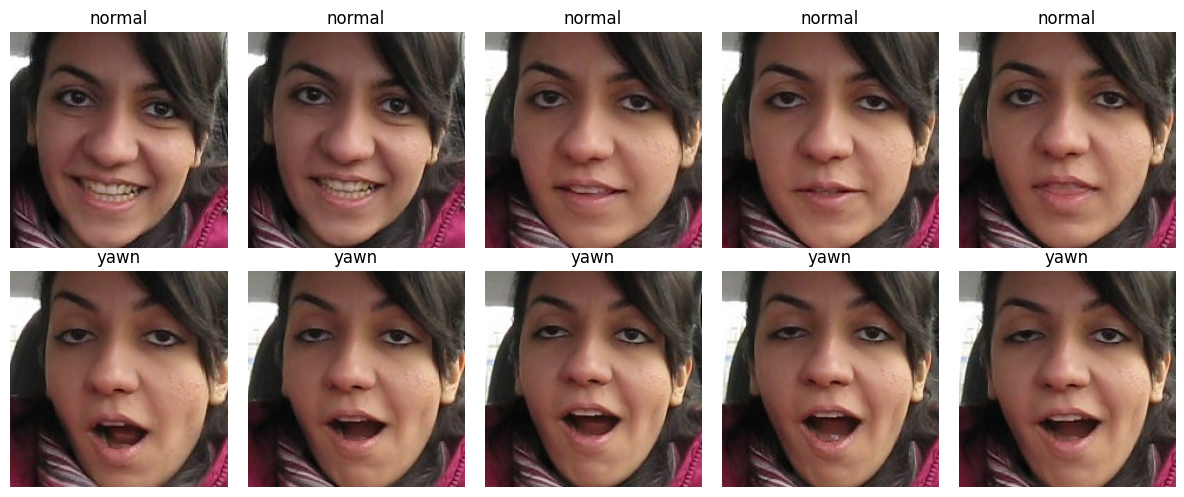

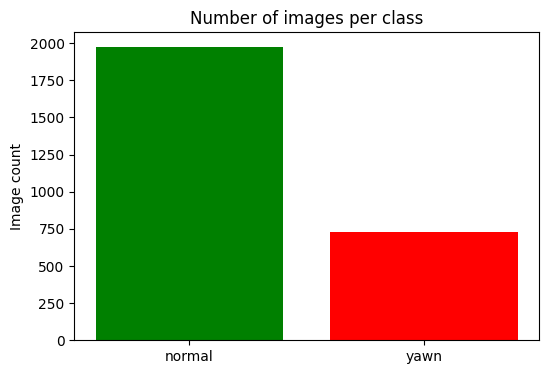

In [21]:
# Explore original dataset and Plot number of images per class


classes = ["normal", "yawn"]
counts = []

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, cls in enumerate(classes):
    class_path = os.path.join(RAW_DATA_DIR, cls)
    files = os.listdir(class_path)[:5]  # first 5 images of each class
    count = len(os.listdir(class_path))
    counts.append(count)
    print(f"Class '{cls}' has {count} images")

    for j, file in enumerate(files):
        img_path = os.path.join(class_path, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert for matplotlib
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(cls)

plt.tight_layout()
plt.show()
# Bar plot
plt.figure(figsize=(6,4))
plt.bar(classes, counts, color=['green','red'])
plt.title("Number of images per class")
plt.ylabel("Image count")
plt.show()

In [22]:
# Preprocess images and split into train/val/test


# Image parameters
IMG_SIZE = (64, 64)  # resize all images to 64x64

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

for cls in classes:
    class_path = os.path.join(RAW_DATA_DIR, cls)
    files = os.listdir(class_path)
    
    # Shuffle files
    np.random.shuffle(files)
    
    n_total = len(files)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)
    n_test = n_total - n_train - n_val

    splits = {
        "train": files[:n_train],
        "val": files[n_train:n_train+n_val],
        "test": files[n_train+n_val:]
    }

    # Process and save images
    for split_name, split_files in splits.items():
        for f in split_files:
            img_path = os.path.join(class_path, f)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       # convert to grayscale
            resized = cv2.resize(gray, IMG_SIZE)               # resize

            save_path = os.path.join(OUTPUT_DIR, split_name, cls, f)
            cv2.imwrite(save_path, resized)


print("Images preprocessed, split, and saved successfully.")


Images preprocessed, split, and saved successfully.


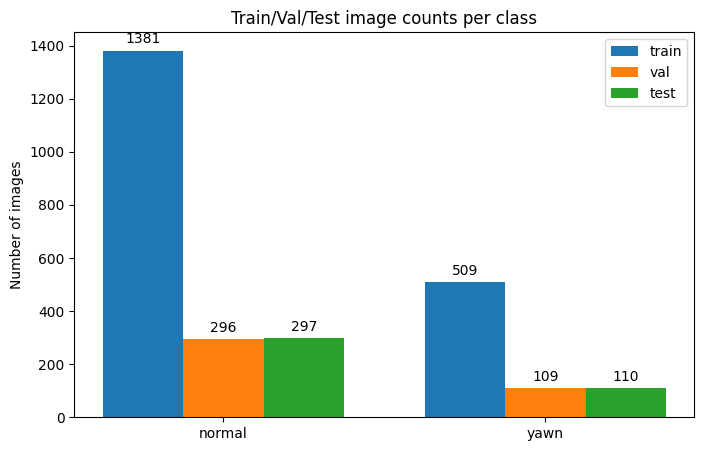

In [26]:
# Plot train/val/test image counts per class with exact numbers

# Count images
counts = {split: [] for split in splits}

for split in splits:
    for cls in classes:
        folder = os.path.join(OUTPUT_DIR, split, cls)
        count = len(os.listdir(folder))
        counts[split].append(count)

# Plot
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))

for i, split in enumerate(splits):
    bars = ax.bar(x + i*width, counts[split], width, label=split)
    # Add numbers on top
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.set_ylabel("Number of images")
ax.set_title("Train/Val/Test image counts per class")
ax.legend()
plt.show()
